In [ ]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
encoding_dim = 32


In [ ]:
input_img = keras.Input(shape=(784,))


In [ ]:
encoded = layers.Dense(encoding_dim,activation='relu')(input_img)
decoded = layers.Dense(784,activation='sigmoid')(encoded)

In [ ]:
autoencoder = keras.Model(input_img,decoded)

In [ ]:
encoder = keras.Model(input_img,encoded)

In [ ]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input,decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
(x_train,_),(x_test,_) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [ ]:
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

In [ ]:
print(x_train.shape)

(60000, 784)


In [ ]:
print(x_test.shape)

(10000, 784)


In [ ]:
autoencoder.fit(x_train,x_train,epochs=13,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3795 - val_loss: 0.1933
Epoch 2/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1827 - val_loss: 0.1561
Epoch 3/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1515 - val_loss: 0.1353
Epoch 4/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1330 - val_loss: 0.1220
Epoch 5/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1208 - val_loss: 0.1135
Epoch 6/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1130 - val_loss: 0.1074
Epoch 7/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1070 - val_loss: 0.1028
Epoch 8/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1034 - val_loss: 0.0996
Epoch 9/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1001 - val_loss: 0.0972
Epoch 10/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0978 - val_loss: 0.0956
Epoch 11/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0963 - val_loss: 0.0944
Epoch 12/13
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [ ]:
encoded_imgs =encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


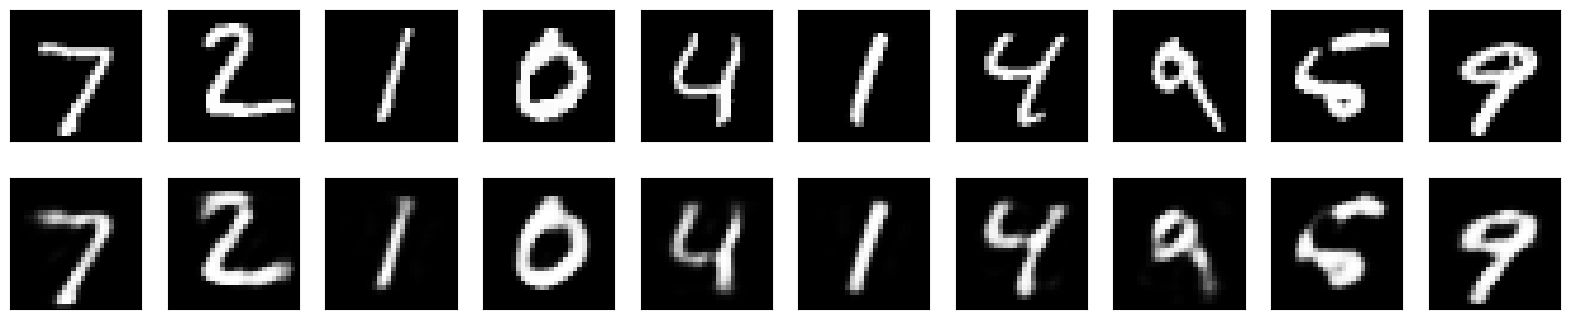

In [ ]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()